In [21]:
import pandas as pd
import numpy as np

data = pd.read_csv("C:/Users/HUAWEI/Desktop/L IA\Manual/Practica4_PREPROCESAMIENTO_DE_DATOS/datasets/Social_Network_Ads.csv")
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,False
1,Male,35,20000,False
2,Female,26,43000,False
3,Female,27,57000,False
4,Male,19,76000,False


In [22]:
data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [23]:
data.shape

(99, 4)

In [24]:
data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased            bool
dtype: object

In [25]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,99.0,30.282828,8.230159,18.0,25.0,28.0,33.5,59.0
EstimatedSalary,99.0,57616.161616,33344.126268,15000.0,27000.0,52000.0,81500.0,150000.0


In [26]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [27]:
df = pd.get_dummies(data, columns = ['Gender'], drop_first = True, dtype=int)
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,False,1
1,35,20000,False,1
2,26,43000,False,0
3,27,57000,False,0
4,19,76000,False,1


In [28]:
df = pd.get_dummies(df, columns = ['Purchased'], drop_first = True, dtype=int)
df.head()

,Age,EstimatedSalary,Gender_Male,Purchased_True
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0


In [29]:
df[['Age', 'EstimatedSalary']] = df[['Age', 'EstimatedSalary']].agg(np.log)
df.head()

,Age,EstimatedSalary,Gender_Male,Purchased_True
0,2.944439,9.852194,1,0
1,3.555348,9.903488,1,0
2,3.258097,10.668955,0,0
3,3.295837,10.950807,0,0
4,2.944439,11.238489,1,0


In [30]:
df = df.drop(columns=['Purchased_True'])
df.head()

,Age,EstimatedSalary,Gender_Male
0,2.944439,9.852194,1
1,3.555348,9.903488,1
2,3.258097,10.668955,0
3,3.295837,10.950807,0
4,2.944439,11.238489,1


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set(style="whitegrid")

Text(0.5, 1.0, 'Distribucion del Salario Estimado')

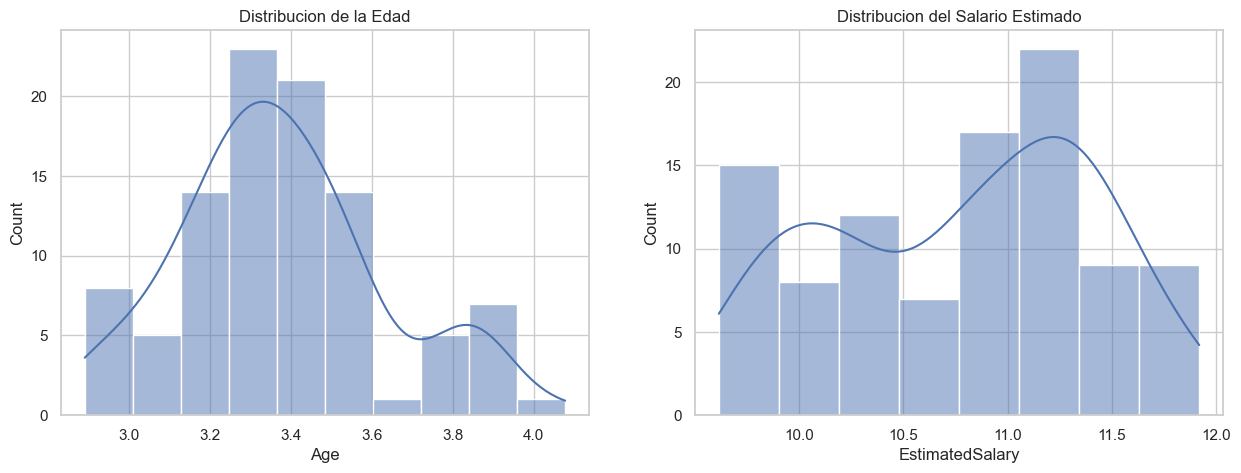

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Age'], kde=True, ax=ax[0])
ax[0].set_title('Distribucion de la Edad')
sns.histplot(df['EstimatedSalary'], kde=True, ax=ax[1])
ax[1].set_title('Distribucion del Salario Estimado')

Text(0.5, 1.0, 'Relacion entre Edad y Salario Estimado')

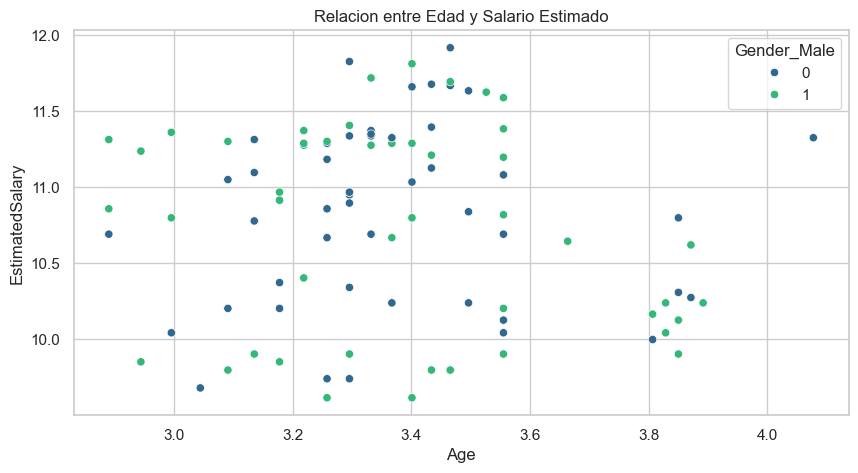

In [37]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Gender_Male', palette='viridis')
plt.title('Relacion entre Edad y Salario Estimado')

<Axes: >

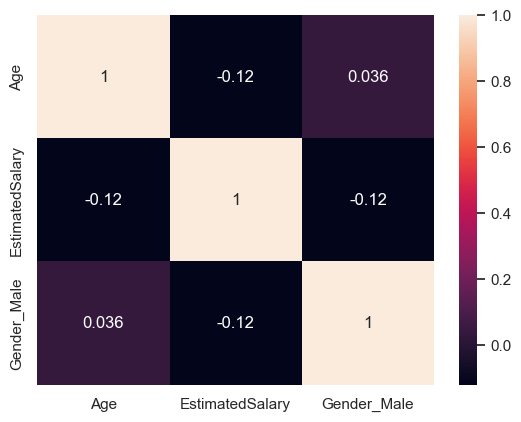

In [38]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [46]:
h1 = df
h1.columns

Index(['Age', 'EstimatedSalary', 'Gender_Male'], dtype='object')

In [48]:
x_h1 = h1[['EstimatedSalary', 'Gender_Male']]
y_h1 = h1['Age']

from sklearn.model_selection import train_test_split
x_h1_train, x_h1_test, y_h1_train, y_h1_test = train_test_split(x_h1, y_h1, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(x_h1_train, y_h1_train)


LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error

prediccion_entrenamiento_train = regresion_lineal.predict(x_h1_train)

mse_h1_train = mean_squared_error(y_true = y_h1_train, y_pred = prediccion_entrenamiento_train)
print('Error cuadratico medio en entrenamiento=' + str(mse_h1_train))

prediccion_entrenamiento_test = regresion_lineal.predict(x_h1_test)

mse_h1_test = mean_squared_error(y_true = y_h1_test, y_pred = prediccion_entrenamiento_test)
print('Error cuadratico medio en test=' + str(mse_h1_test))

Error cuadratico medio en entrenamiento=0.05170120307647006
Error cuadratico medio en test=0.10840709333291769


In [56]:
h2 = df
h2.columns

x_h2 = h2[['EstimatedSalary', 'Gender_Male']]
y_h2 = h2['Age']

In [58]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
h2[['EstimatedSalary', 'Gender_Male']] = scaler.fit_transform(h2[['EstimatedSalary', 'Gender_Male']])

x_h2 = h2[['EstimatedSalary', 'Gender_Male']]
y_h2 = h2['Age']

x_h2_train, x_h2_test, y_h2_train, y_h2_test = train_test_split(x_h2, y_h2, test_size=0.2, random_state=43)
regresion_linear = LinearRegression()
regresion_linear.fit(x_h2_train, y_h2_train)

LinearRegression()